In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from bs4 import BeautifulSoup

In [20]:
import yfinance as yf
import json
import requests

## APPLE

In [21]:
apple = yf.Ticker('AAPL')

In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"

response = requests.get(url)

if response.status_code == 200:
    with open("apple.json", "wb") as f:
        f.write(response.content)
    print(f"Download success, status code {response.status_code}")
else:
    print(f"Download problem, status code {response.status_code}")

Download success, status code 200


In [23]:
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    print(apple_info)
    type(apple_info)
apple_info

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 100000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [36]:
print(apple_info["country"], apple_info["sector"])

United States Technology


In [37]:
apple.history(period="max")["Volume"]

c:\Users\matia\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Date
1980-12-12 00:00:00-05:00    469033600
1980-12-15 00:00:00-05:00    175884800
1980-12-16 00:00:00-05:00    105728000
1980-12-17 00:00:00-05:00     86441600
1980-12-18 00:00:00-05:00     73449600
                               ...    
2024-06-14 00:00:00-04:00     70122700
2024-06-17 00:00:00-04:00     93728300
2024-06-18 00:00:00-04:00     79943300
2024-06-20 00:00:00-04:00     86172500
2024-06-21 00:00:00-04:00    241805100
Name: Volume, Length: 10972, dtype: int64

# Extracting Share Price

In [24]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data

c:\Users\matia\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-14 00:00:00-04:00,213.850006,215.169998,211.300003,212.490005,70122700,0.0,0.0
2024-06-17 00:00:00-04:00,213.369995,218.949997,212.720001,216.669998,93728300,0.0,0.0
2024-06-18 00:00:00-04:00,217.589996,218.630005,213.000000,214.289993,79943300,0.0,0.0


In [25]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


In [26]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

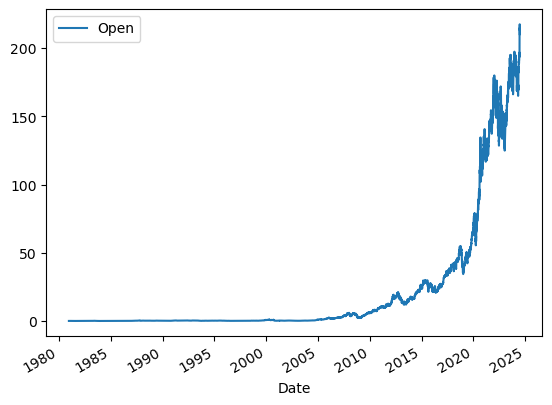

In [27]:
apple_share_price_data.plot(x="Date", y="Open")

## Extracting Dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
Name: Dividends, Length: 83, dtype: float64


<Axes: xlabel='Date'>

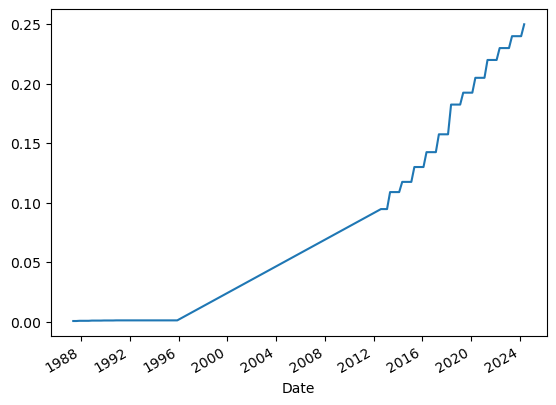

In [28]:
print(apple.dividends)
apple.dividends.plot()

---

## AMD

In [29]:
AMD = yf.Ticker("AMD")

In [30]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"
response = requests.get(url)

if response.status_code == 200:
    with open("amd.json", "wb") as f:
        f.write(response.content)
    print(f"Download success, status code {response.status_code} 'amd.json'.")
else:
    print(f"Download problem, status code {response.status_code}")


Download success 'amd.json'.


In [31]:
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    print(amd_info)
    print(type(amd_info))
amd_info

{'zip': '95054', 'sector': 'Technology', 'fullTimeEmployees': 15500, 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphics 

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [32]:
AMD.history(period="max")

c:\Users\matia\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-14 00:00:00-04:00,158.500000,161.339996,157.610001,159.630005,34054000,0.0,0.0
2024-06-17 00:00:00-04:00,158.000000,159.229996,154.139999,158.399994,44507700,0.0,0.0
2024-06-18 00:00:00-04:00,156.990005,157.240005,153.339996,154.630005,51852000,0.0,0.0


In [33]:
print(amd_info["country"], amd_info["sector"])

United States Technology


In [34]:
AMD.history(period="max")["Volume"]

c:\Users\matia\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Date
1980-03-17 00:00:00-05:00      219600
1980-03-18 00:00:00-05:00      727200
1980-03-19 00:00:00-05:00      295200
1980-03-20 00:00:00-05:00      159600
1980-03-21 00:00:00-05:00      130800
                               ...   
2024-06-14 00:00:00-04:00    34054000
2024-06-17 00:00:00-04:00    44507700
2024-06-18 00:00:00-04:00    51852000
2024-06-20 00:00:00-04:00    93245700
2024-06-21 00:00:00-04:00    61293900
Name: Volume, Length: 11160, dtype: int64

In [35]:
AMD.history(period="max")["Volume"][0]

c:\Users\matia\anaconda3\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\matia\AppData\Local\Temp\ipykernel_18956\1681190819.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AMD.history(period="max")["Volume"][0]


219600